# **Detección de fraudes con tarjetas de crédito**

In [2]:
# Importa la bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# importamos dataset

In [4]:
# Organizar los datos en un dataframe los incluimos es una variable y mostramos las primeras filas
creditcard_pd=pd.read_csv("creditcard.csv")
creditcard_pd.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
#realizamos el conteo o sumatorio de los nulos para eliminar los datos. La visualización nos indica que ninguna fila contiene valores nulos.
creditcard_pd.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
#recogemos los datos duplicados en una variable llamada duplicados. Aunque podemos realizarlo en un paso, como se indica al principio, lo realizamos en dos para que se vea de una forma más clara 
#lo que hemos realizado.
creditcard_pd.duplicated().sum()

np.int64(1081)

In [7]:
duplicados= creditcard_pd.duplicated()
duplicados


0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

In [8]:
#por último podemos eliminar los datos duplicados utilizando drop_duplicates
creditcard_limpio = creditcard_pd.drop_duplicates()
creditcard_limpio

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [9]:
# Calcula el porcentaje de transacciones fraudulentas
#incluimos en una variable las transacciones fraudulentas y luego en otra llamada portentaje realizamos el cálculo
#al insertar los datos en variables conseguimos no tener que reescribir el código, reutilizando las variables cuando sea necesario
#dividiendo la longitud de las fraudulentas entre el total, multiplicando por el total
fraudulentas = creditcard_limpio.loc[creditcard_limpio["Class"]== 1]
porcentaje=len(fraudulentas)/len(creditcard_limpio)*100
# Muestra el porcentaje de transacciones fraudulentas, redondeándolo a 4 decimales)
print(f"El porcentaje de transacciones fraudulentas es de {round(porcentaje, 4)}%")


El porcentaje de transacciones fraudulentas es de 0.1667%


In [10]:
# Calcula el importe medio de las transacciones fraudulentas
#dado que ya tenemos la variable fraudulentas, simplemente tenemos que realizar la media de la columna amount
media_fraudulentas= fraudulentas.Amount.mean()

# Muestra el importe medio de las transacciones fraudulentas
print(f"El importe medio de las transacciones fraudulentas es de {media_fraudulentas.round(2)}")

El importe medio de las transacciones fraudulentas es de 123.87


In [11]:
# Cuenta el número de transacciones fraudulentas y no fraudulentes
#Las transacciones fraudulentas ya las teníamos recogidas en una variable, nos queda pasar la longitud a una nueva variable 
#las no fraudulentas, podemos hacerlo de dos maneras, restando al total las fraudulentas o filtrando por Class= 0

trans_fraudulentas = len(fraudulentas)
trans_no_fraudulentas = len(creditcard_limpio)-len(fraudulentas) 
trans_no_fraudulentas2 = len(creditcard_limpio.loc[creditcard_limpio["Class"]== 0])

#observamos cómo el resultado es el mismo
print(f"El número de transacciones fraudulentas es {trans_fraudulentas} y el de no fraudulentas de {trans_no_fraudulentas}")
print(f"El número de transacciones fraudulentas es {trans_fraudulentas} y el de no fraudulentas de {trans_no_fraudulentas2}")

El número de transacciones fraudulentas es 473 y el de no fraudulentas de 283253
El número de transacciones fraudulentas es 473 y el de no fraudulentas de 283253


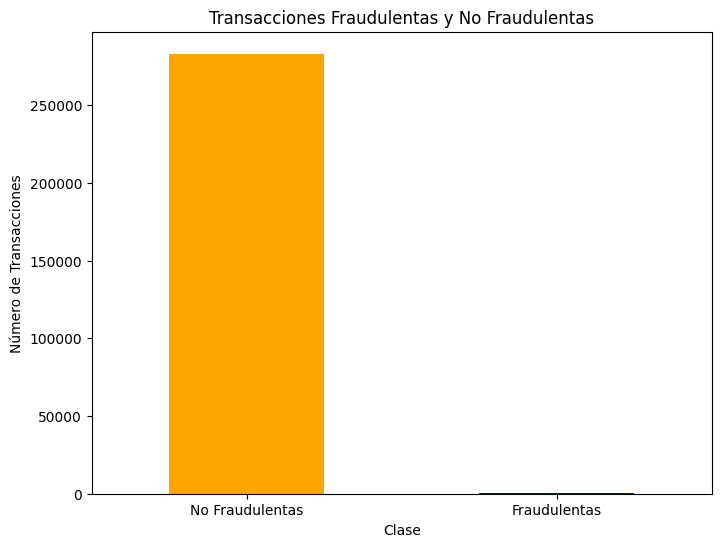

In [12]:
# Contar el número de transacciones fraudulentas y no fraudulentas
conteo = creditcard_limpio['Class'].value_counts()

# Creamos un gráfico de barras
plt.figure(figsize=(8, 6))
conteo.plot(kind='bar', color=['orange', 'blue'])
plt.title('Transacciones Fraudulentas y No Fraudulentas')
plt.xlabel('Clase')
plt.ylabel('Número de Transacciones')
plt.xticks(ticks=[0, 1], labels=['No Fraudulentas', 'Fraudulentas'], rotation=0)
plt.show()


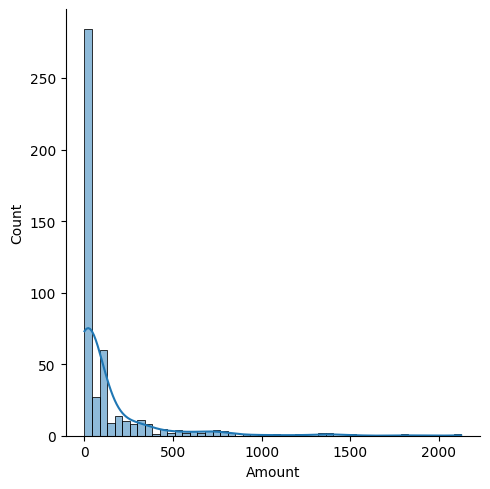

In [13]:
# Separa los datos de transacciones fraudulentas
#las transacciones fraudulentas ya las recogimos anteriormente en una variable, lo que nos permite poder utilizarlas cuando lo necesitemos como ahora seleccionando la columna Amount
fraudulentas.Amount

# Muestra la distribución de los importes de las transacciones fraudulentas, lo mimitamos a 50 barras, para que se vea de una manera más clara
'''histograma=sns.histplot(
    fraudulentas,
    x="Amount", hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)'''
sns.displot(fraudulentas.Amount,kde=True, bins=50 )


<Axes: ylabel='Frequency'>

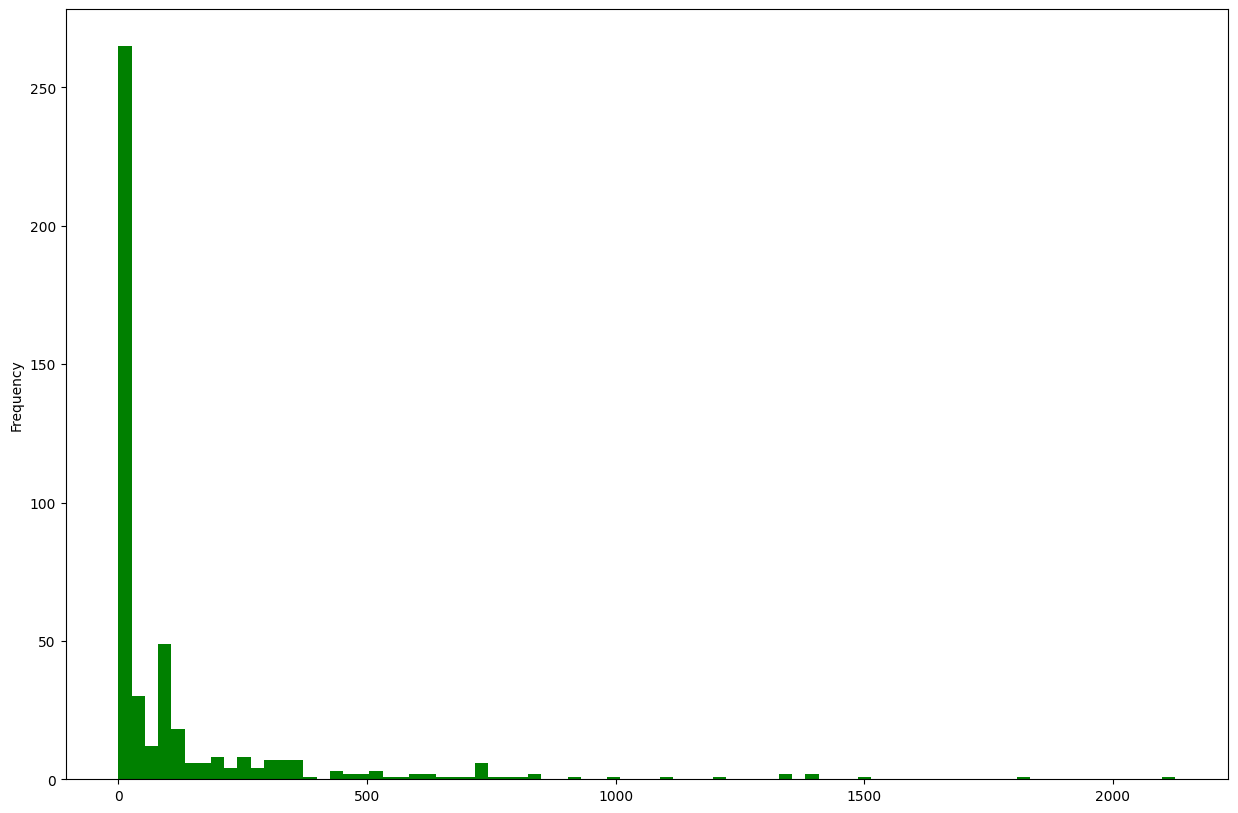

In [14]:
#podemos generar directamente el histograma directamente desde el dataframe y hacerlo más grande
fraudulentas.Amount.plot.hist(bins=80, figsize=(15,10), color="green")

In [15]:
fraudulentas

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [16]:
# Separa los datos de entrenamiento y evaluación
#importamos el módulo, creamos las variables X e Y y el modelo de entrenamiento
from sklearn.model_selection import train_test_split
X= creditcard_limpio.drop("Class", axis=1)
Y= creditcard_limpio.Class

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=45)

In [17]:
#Escribe tu código aquí
#importamos el randomForestClassifierm y entrenamos el modelo
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=80, max_depth=150)
random_forest.fit(X_train, Y_train)
predicciones = random_forest.predict(X_test)
predicciones

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
#por último, evaluamos los modelos
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(Y_test,predicciones))
print(confusion_matrix(Y_test,predicciones))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56665
           1       0.86      0.70      0.78        81

    accuracy                           1.00     56746
   macro avg       0.93      0.85      0.89     56746
weighted avg       1.00      1.00      1.00     56746

[[56656     9]
 [   24    57]]


In [19]:
#para finalizar, mediante el accuracy_score medimos el porcentaje de efectividad del modelo
score = accuracy_score(Y_test, predicciones)
print(f"La exactitud del modelo es de un {round(score*100, 2)}%")

La exactitud del modelo es de un 99.94%


In [20]:
from sklearn.linear_model import LinearRegression, LogisticRegression
#podemos probar otro tipo, como la regresión lineal para verificar la efectividad con diferentes modelos
x= creditcard_limpio.drop("Class", axis=1)
y= creditcard_limpio.Class
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7, random_state=45)
modelo= LogisticRegression()
modelo.fit(x_train, y_train)
predicciones= modelo.predict(x_test)
predicciones
print(classification_report(y_test, predicciones))

print(confusion_matrix(y_test, predicciones)) 

score2 = accuracy_score(y_test, predicciones)
print(f"La exactitud del modelo es de un {round(score2*100, 2)}%")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84996
           1       0.60      0.63      0.61       122

    accuracy                           1.00     85118
   macro avg       0.80      0.82      0.81     85118
weighted avg       1.00      1.00      1.00     85118

[[84944    52]
 [   45    77]]
La exactitud del modelo es de un 99.89%


### Conclusión: el modelo óptimo es el de Random Forest, con una exactitud ligeramente superior